# Background
Start here if...
You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

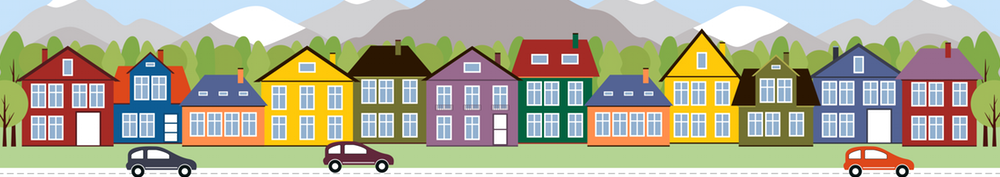

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting
# Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import zipfile
import os
%matplotlib inline

In [310]:
os.chdir('D:/Karir/Iykra Fellowship/task/week 4/Practice Product Classification')
trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

In [311]:
print("train shape:",trainset.shape)
print("test shape",testset.shape)

train shape: (1460, 81)
test shape (1459, 80)


In [312]:
# cheking head of train
trainset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [313]:
# checking head of train
testset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


From train and test theere are severals missing value. 

In [314]:
trainset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [315]:
testset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [316]:
#build function to count caolumn that has missing value
def column_nan(missing):
    s = []
    for i in missing:
        if i > 0:
            s.append(i)
    print(len(s))

In [317]:
for i in cleaning_test:
    print(i,':', cleaning_test[i].unique())

Id : [1461 1462 1463 ... 2917 2918 2919]
MSSubClass : [ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150]
MSZoning : ['RH' 'RL' 'RM' 'FV' 'C (all)']
LotFrontage : [ 80.  81.  74.  78.  43.  75.  60.  63.  85.  70.  26.  21.  24. 102.
  94.  90.  79. 110. 105.  41. 100.  67.  73.  92.  84.  39.  88.  25.
  30.  57.  68.  98. 120.  87. 119.  65.  56.  69.  50.  53.  52.  51.
  72.  86. 124.  44.  83.  64.  82.  38.  89.  35.  58.  66.  93.  31.
  76.  28.  61.  95. 129.  59.  77.  96.  47.  34. 117.  48.  62.  42.
 106. 112.  32. 115.  71.  45. 109. 113. 125. 101. 104. 108. 130. 135.
  36.  55. 136.  97.  91.  37.  22. 103.  99.  40. 123.  54. 107. 150.
 160. 195. 128.  33. 118. 134. 155. 126.  46. 149. 200. 121. 131. 114.
  49. 133. 140.]
LotArea : [11622 14267 13830 ...  1894 20000 10441]
Street : ['Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities : ['AllPub']
LotConfig : ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlo

PoolArea : [  0 144 368 444 228 561 800]
MiscVal : [    0 12500   500  1500   300   450    80   600   490  1200   650   400
   900  2500   700   750  2000  6500  1000  4500  3000 17000  1512   455
   460   420]
MoSold : [ 6  3  1  4  5  2  7 10  8 11  9 12]
YrSold : [2010 2009 2008 2007 2006]
SaleType : ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD']
SaleCondition : ['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']


# See Nan Value

In [318]:
#trainset
train = trainset.isnull().sum().sort_values(ascending = False)
column_nan(train)


19


In [319]:
#testset
test = testset.isnull().sum().sort_values(ascending = False)
column_nan(test)

33


# Looking for variables which is NaN

In [320]:
#summing missing value trainset
nan_train = trainset.isnull().sum().sort_values(ascending = False).head(20).reset_index().sort_values(0,ascending=False)
nan_train.columns = ['variable','total_nan']
nan_train = nan_train[nan_train['total_nan'] > 0]#select only has nan value variable
#geting list that has variable nan
list_nan_train = nan_train['variable'].values.tolist()
list_nan_train

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [321]:
#sum nan in test
nan_test = testset.isnull().sum().sort_values(ascending = False).head(35).reset_index().sort_values(0,ascending=False)
nan_test.columns = ['variable','total_nan']
nan_test = nan_test[nan_test['total_nan'] > 0] #select only has nan value variable
#geting list that has variable nan
list_nan_test = nan_test['variable'].values.tolist()
list_nan_test

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageFinish',
 'GarageYrBlt',
 'GarageQual',
 'GarageCond',
 'GarageType',
 'BsmtCond',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'Utilities',
 'Functional',
 'BsmtFullBath',
 'BsmtHalfBath',
 'SaleType',
 'GarageCars',
 'GarageArea',
 'KitchenQual',
 'Exterior1st',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2']

# Seeing persentage in NaN variables

In [322]:
#seeing type datasets of train type in nan variable
nan_train['percentage %'] = nan_train['total_nan']/len(trainset)
print('Total missing values in trainsets:')
nan_train

Total missing values in trainsets:


,variable,total_nan,percentage %
0,PoolQC,1453,0.995205
1,MiscFeature,1406,0.963014
2,Alley,1369,0.937671
3,Fence,1179,0.807534
4,FireplaceQu,690,0.472603
5,LotFrontage,259,0.177397
8,GarageYrBlt,81,0.055479
9,GarageFinish,81,0.055479
10,GarageQual,81,0.055479
7,GarageType,81,0.055479


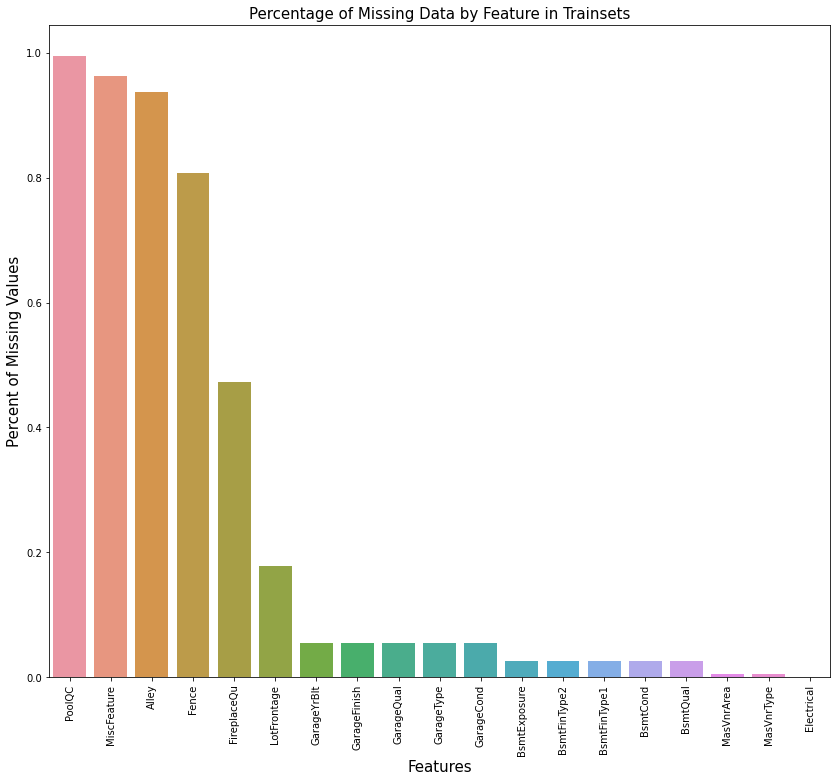

In [323]:
fig, axes = plt.subplots(figsize=(14,12))
x = nan_train['variable']
y = nan_train['percentage %']
sns.barplot(x,y)
plt.xticks(rotation='90')
plt.title('Percentage of Missing Data by Feature in Trainsets',fontsize =15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.savefig('trainset missing.png')

In [324]:
#seeing type datasets of train type in nan variable
nan_test['percentage %'] = nan_test['total_nan']/len(testset)
print('Total missing values in testset:')
nan_test

Total missing values in testset:


,variable,total_nan,percentage %
0,PoolQC,1456,0.997944
1,MiscFeature,1408,0.965045
2,Alley,1352,0.926662
3,Fence,1169,0.801234
4,FireplaceQu,730,0.500343
5,LotFrontage,227,0.155586
9,GarageFinish,78,0.053461
8,GarageYrBlt,78,0.053461
7,GarageQual,78,0.053461
6,GarageCond,78,0.053461


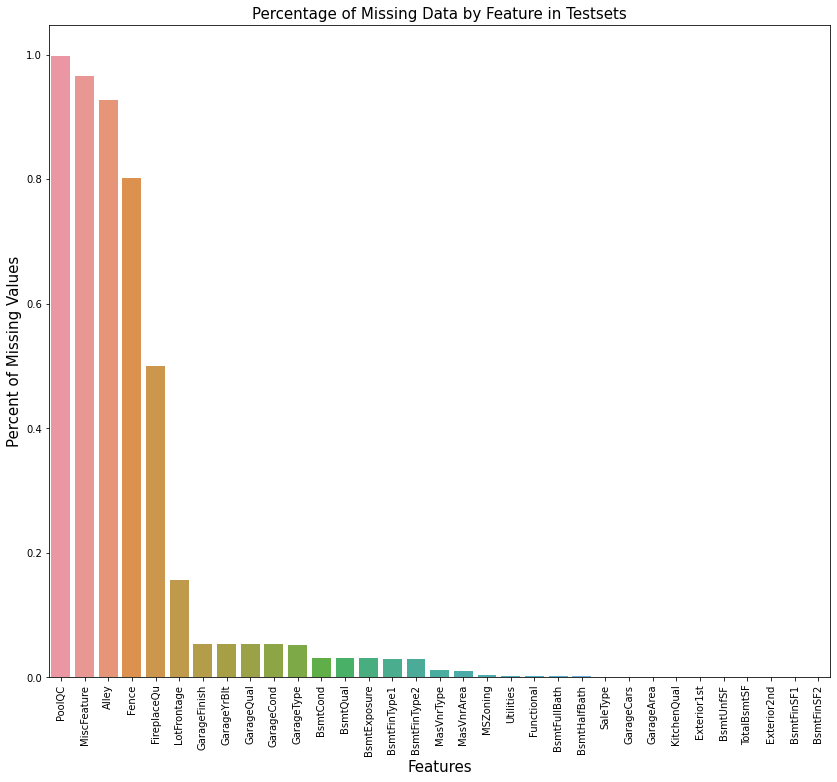

In [325]:
fig, axes = plt.subplots(figsize=(14,12))
x = nan_test['variable']
y = nan_test['percentage %']
sns.barplot(x,y)
plt.xticks(rotation='90')
plt.title('Percentage of Missing Data by Feature in Testsets',fontsize =15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.savefig('testset missing.png')

# Cleaning

In [326]:
# #clean columns 'PoolQC','MiscFeature','Alley','Fence' because columns has missing values more than 80%
cleaning_train = trainset.drop(['PoolQC','MiscFeature','Alley','Fence'], axis= 1)
cleaning_test = testset.drop(['PoolQC','MiscFeature','Alley','Fence'], axis= 1)

<h2>Cleaning Train in numeric and categorical variable<h2>

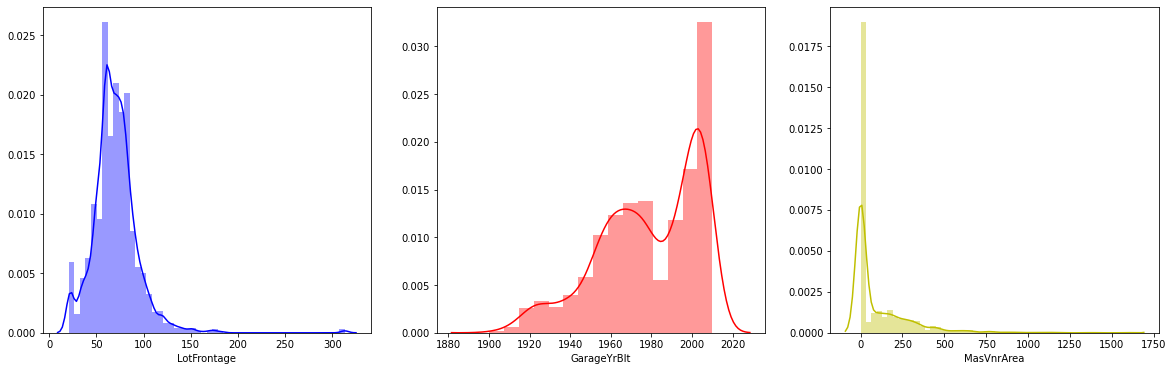

In [327]:
int_var_train = trainset[list_train_clean].describe().columns.values.tolist()
dirt_dist = trainset[int_var_train]
fig,axes = plt.subplots(1,3, figsize = (20,6))
sns.distplot(dirt_dist['LotFrontage'], color = 'b',ax = axes[0])
sns.distplot(dirt_dist['GarageYrBlt'], color = 'r', ax = axes[1])
sns.distplot(dirt_dist['MasVnrArea'], color = 'y',ax = axes[2])

In [328]:
#seeing nan in trainset
#cleaning_test['BsmtHalfBath'].replace('nan', np.NaN, inplace = True)
print("the column has 77, because we drop 4 more that has Nan more 80%") 
cleaning_train.shape


the column has 77, because we drop 4 more that has Nan more 80%


(1460, 77)

<h2>Cleaning Test in numeric and categorical variable<h2>

# 2. Cheking feature performance and correlation

# EDA

In [329]:
cleaning_train['SalePrice'].mean()

180921.19589041095

In [330]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Numerical

In [331]:
# train
num_train = cleaning_train.dtypes[cleaning_train.dtypes != "object"].index
num_train = num_train.drop("SalePrice")
# test
num_test = cleaning_test.dtypes[cleaning_test.dtypes != "object"].index

C:\Users\ronny\anaconda3\envs\TF env\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ronny\anaconda3\envs\TF env\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ronny\anaconda3\envs\TF env\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ronny\anaconda3\envs\TF env\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ronny\anaconda3\envs\TF env\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ronny\anacon

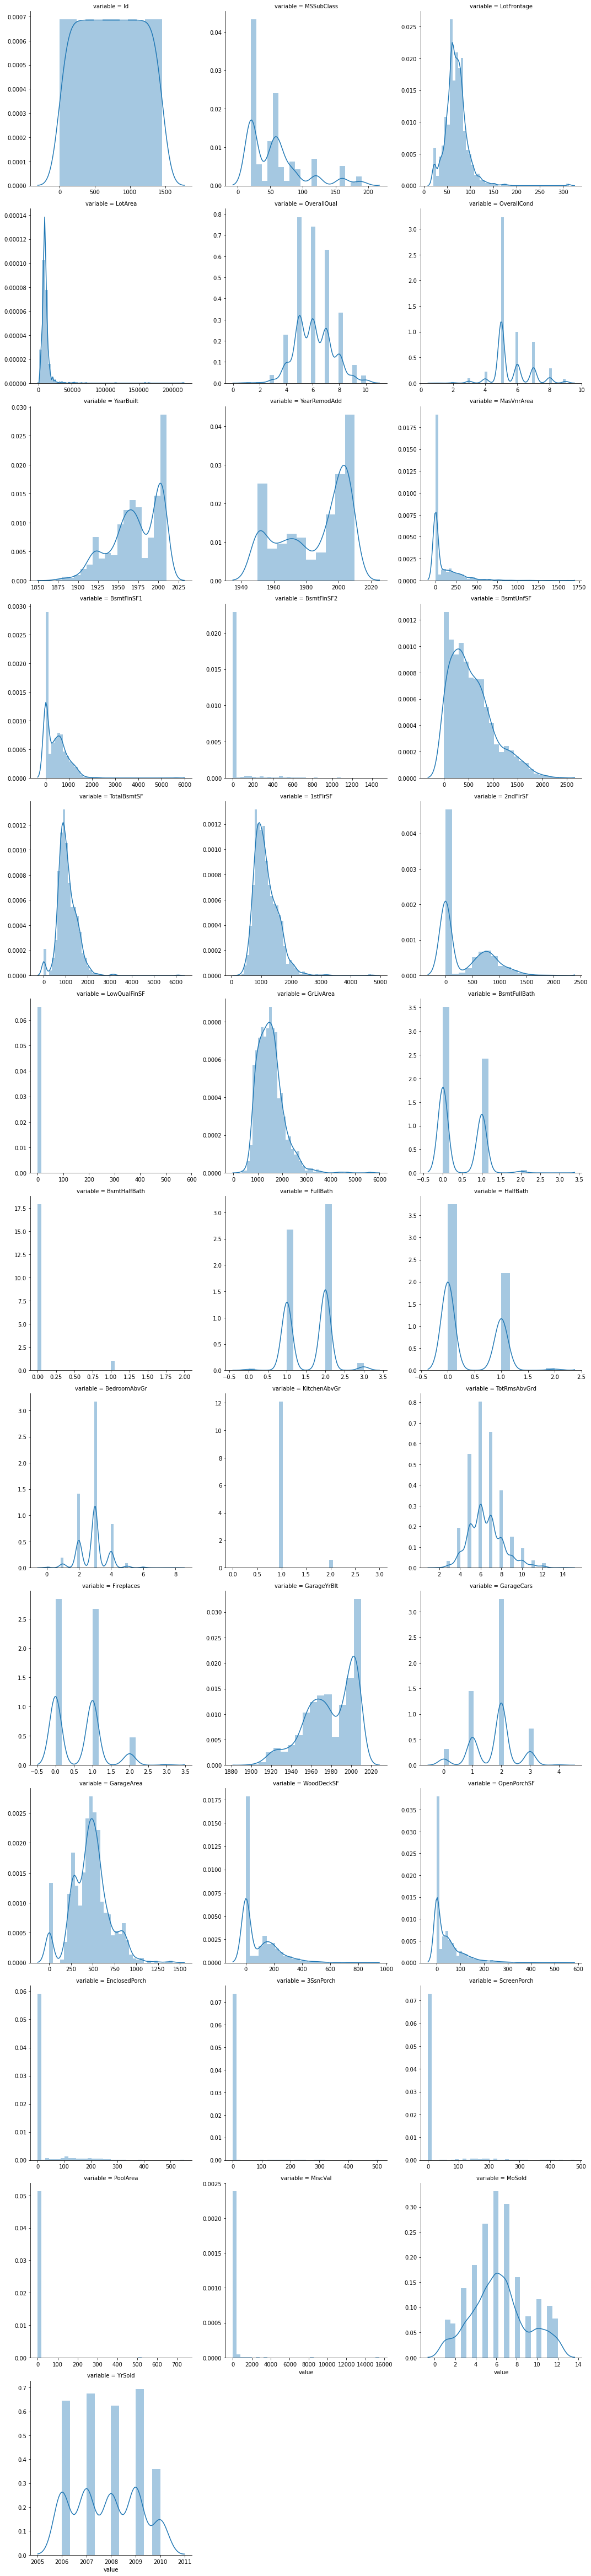

In [332]:
f = pd.melt(cleaning_train, value_vars=num_train)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.distplot, "value")
plt.show()

C:\Users\ronny\anaconda3\envs\TF env\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


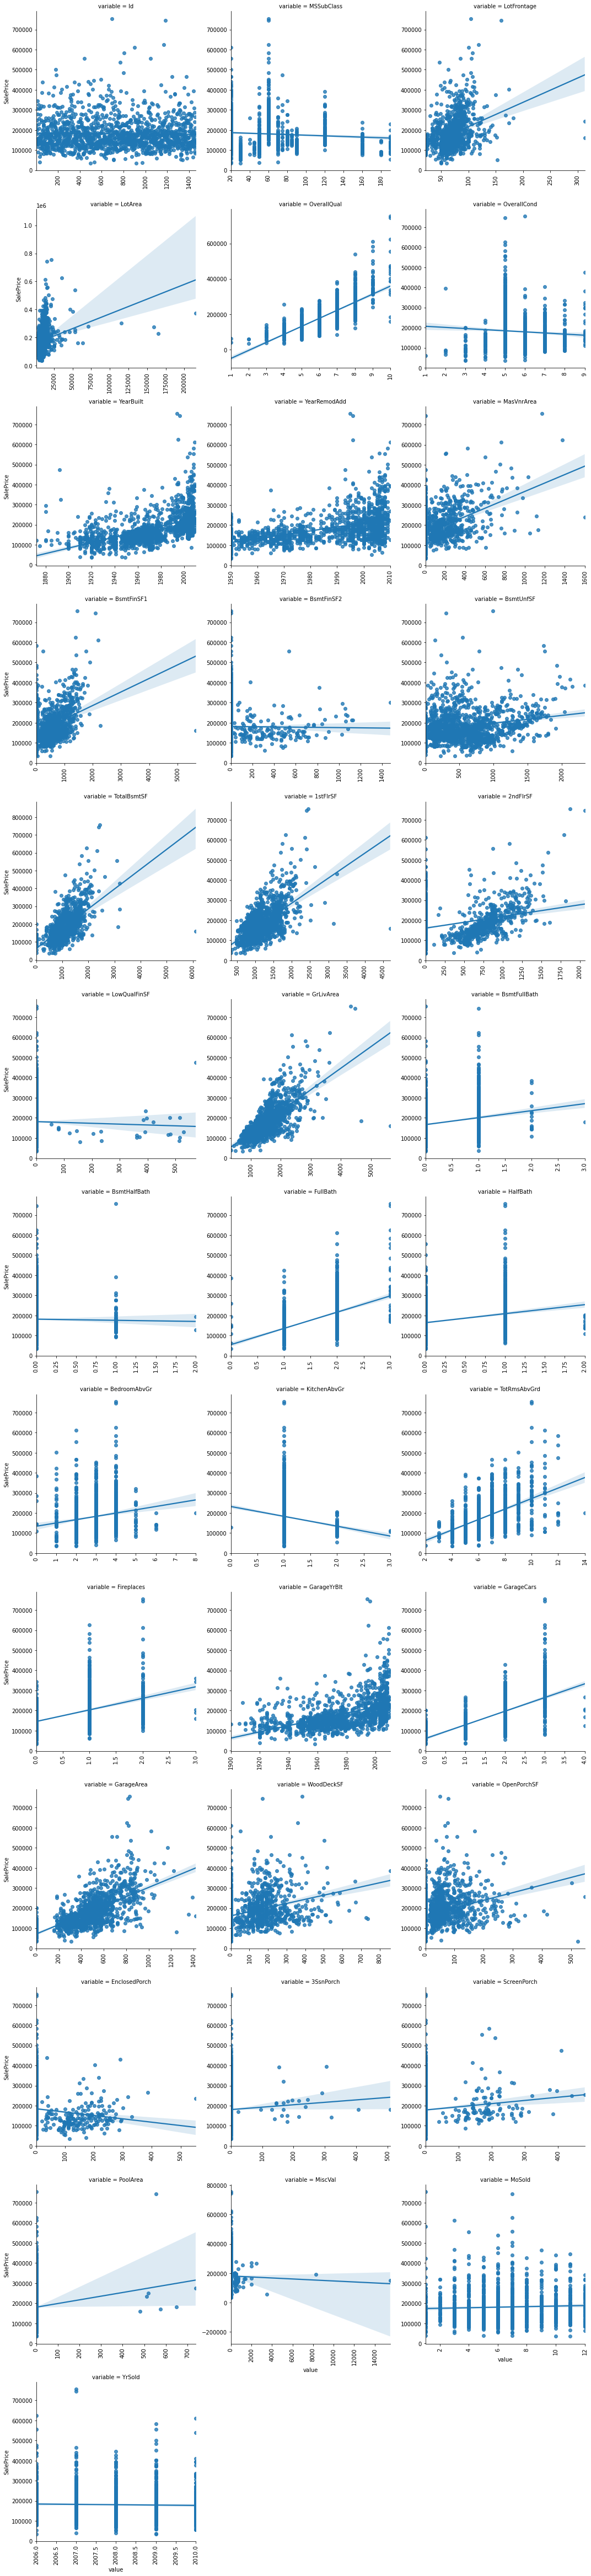

In [333]:
# plot correlation
def regplot(x, y, **kwargs):
    sns.regplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(cleaning_train, id_vars=['SalePrice'], value_vars=num_train)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(regplot, "value", "SalePrice")
plt.show()


# Categorical

In [334]:
cat_train = cleaning_train.dtypes[cleaning_train.dtypes == "object"].index

C:\Users\ronny\anaconda3\envs\TF env\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ronny\anaconda3\envs\TF env\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


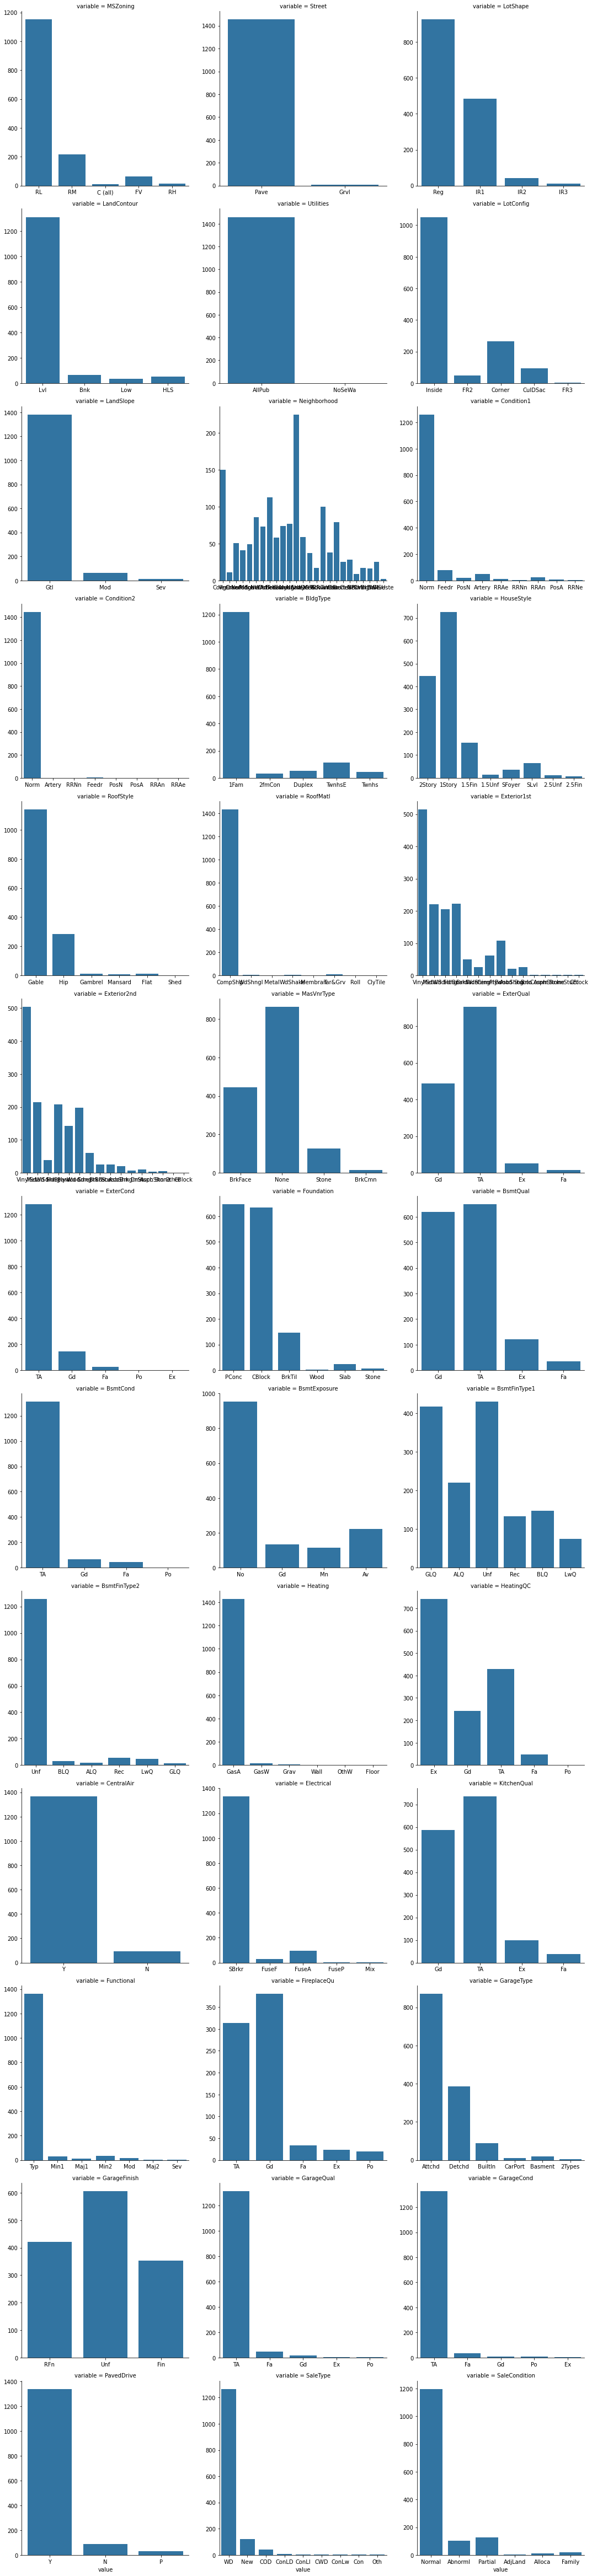

In [335]:
f = pd.melt(cleaning_train, value_vars=cat_train)
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.countplot, "value")
plt.show()

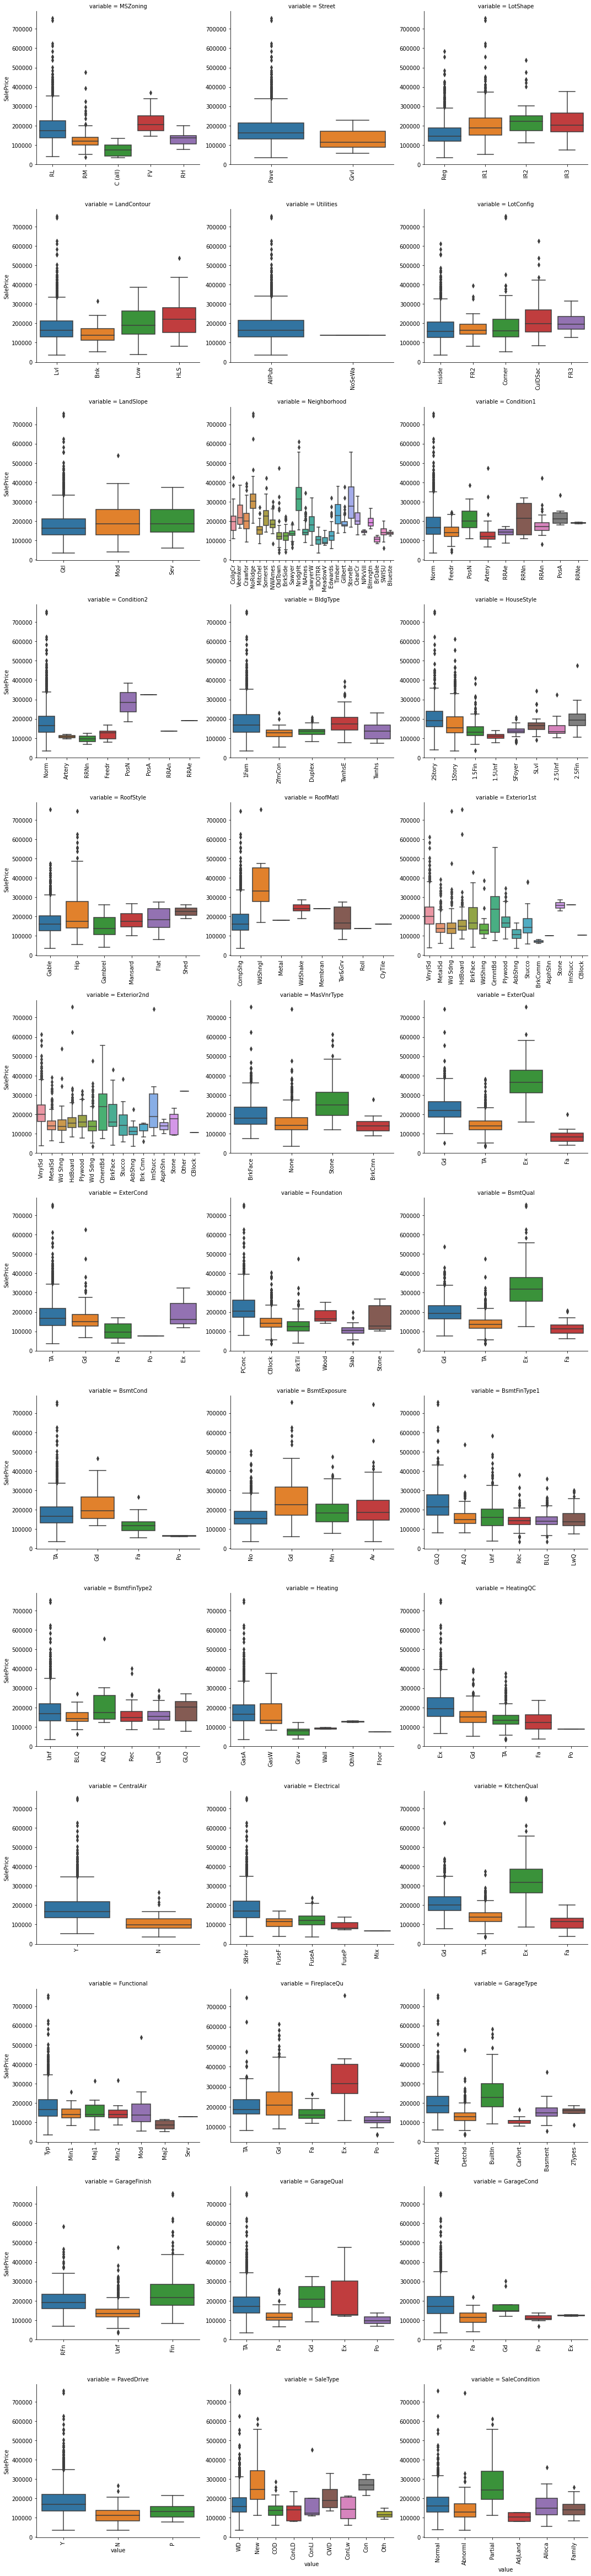

all variable has outliers


In [336]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(cleaning_train, id_vars=['SalePrice'], value_vars=cat_train)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")
plt.show()
print('all variable has outliers')

In [337]:
# list variable after drop variable that has more 80% NaN
list_train_clean = nan_train.iloc[4:]['variable'].tolist()
list_test_clean = nan_test.iloc[4:]['variable'].tolist()
len(list_train_clean)

15

In [338]:
# chosing numerical variable in test
numerical_test = cleaning_test[list_test_clean].describe().columns.values.tolist()
cleaning_test[numerical_test] = cleaning_test[numerical_test].fillna(cleaning_test[numerical_test].mode().iloc[0])
#categorical testset NaN
categ_Nan = [s for s in list_test_clean if s not in numerical_test]
cleaning_test[categ_Nan] = cleaning_test[categ_Nan].fillna(cleaning_test[categ_Nan].mode().iloc[0])
print("the column has 76, because we drop 4 more that has Nan more 80%") 
cleaning_test.shape
cleaning_train.describe()

the column has 76, because we drop 4 more that has Nan more 80%


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [339]:
# handling numeric variable that has Nan with median
cleaning_train[int_var_train] = trainset[int_var_train].fillna(trainset[int_var_train].median())
#handling categorical
list_category = [s for s in list_train_clean if s not in int_var_train]
cleaning_train[list_category] = trainset[list_category].fillna(trainset[list_category].mode().iloc[0])
cleaning_train.isnull().sum().sort_values()

Id              0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
               ..
Exterior1st     0
RoofMatl        0
RoofStyle       0
ExterCond       0
SalePrice       0
Length: 77, dtype: int64

In [340]:
cleaning_test.isnull().sum().sort_values()

Id               0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
                ..
Exterior1st      0
RoofMatl         0
RoofStyle        0
ExterCond        0
SaleCondition    0
Length: 76, dtype: int64

# Heatmap 

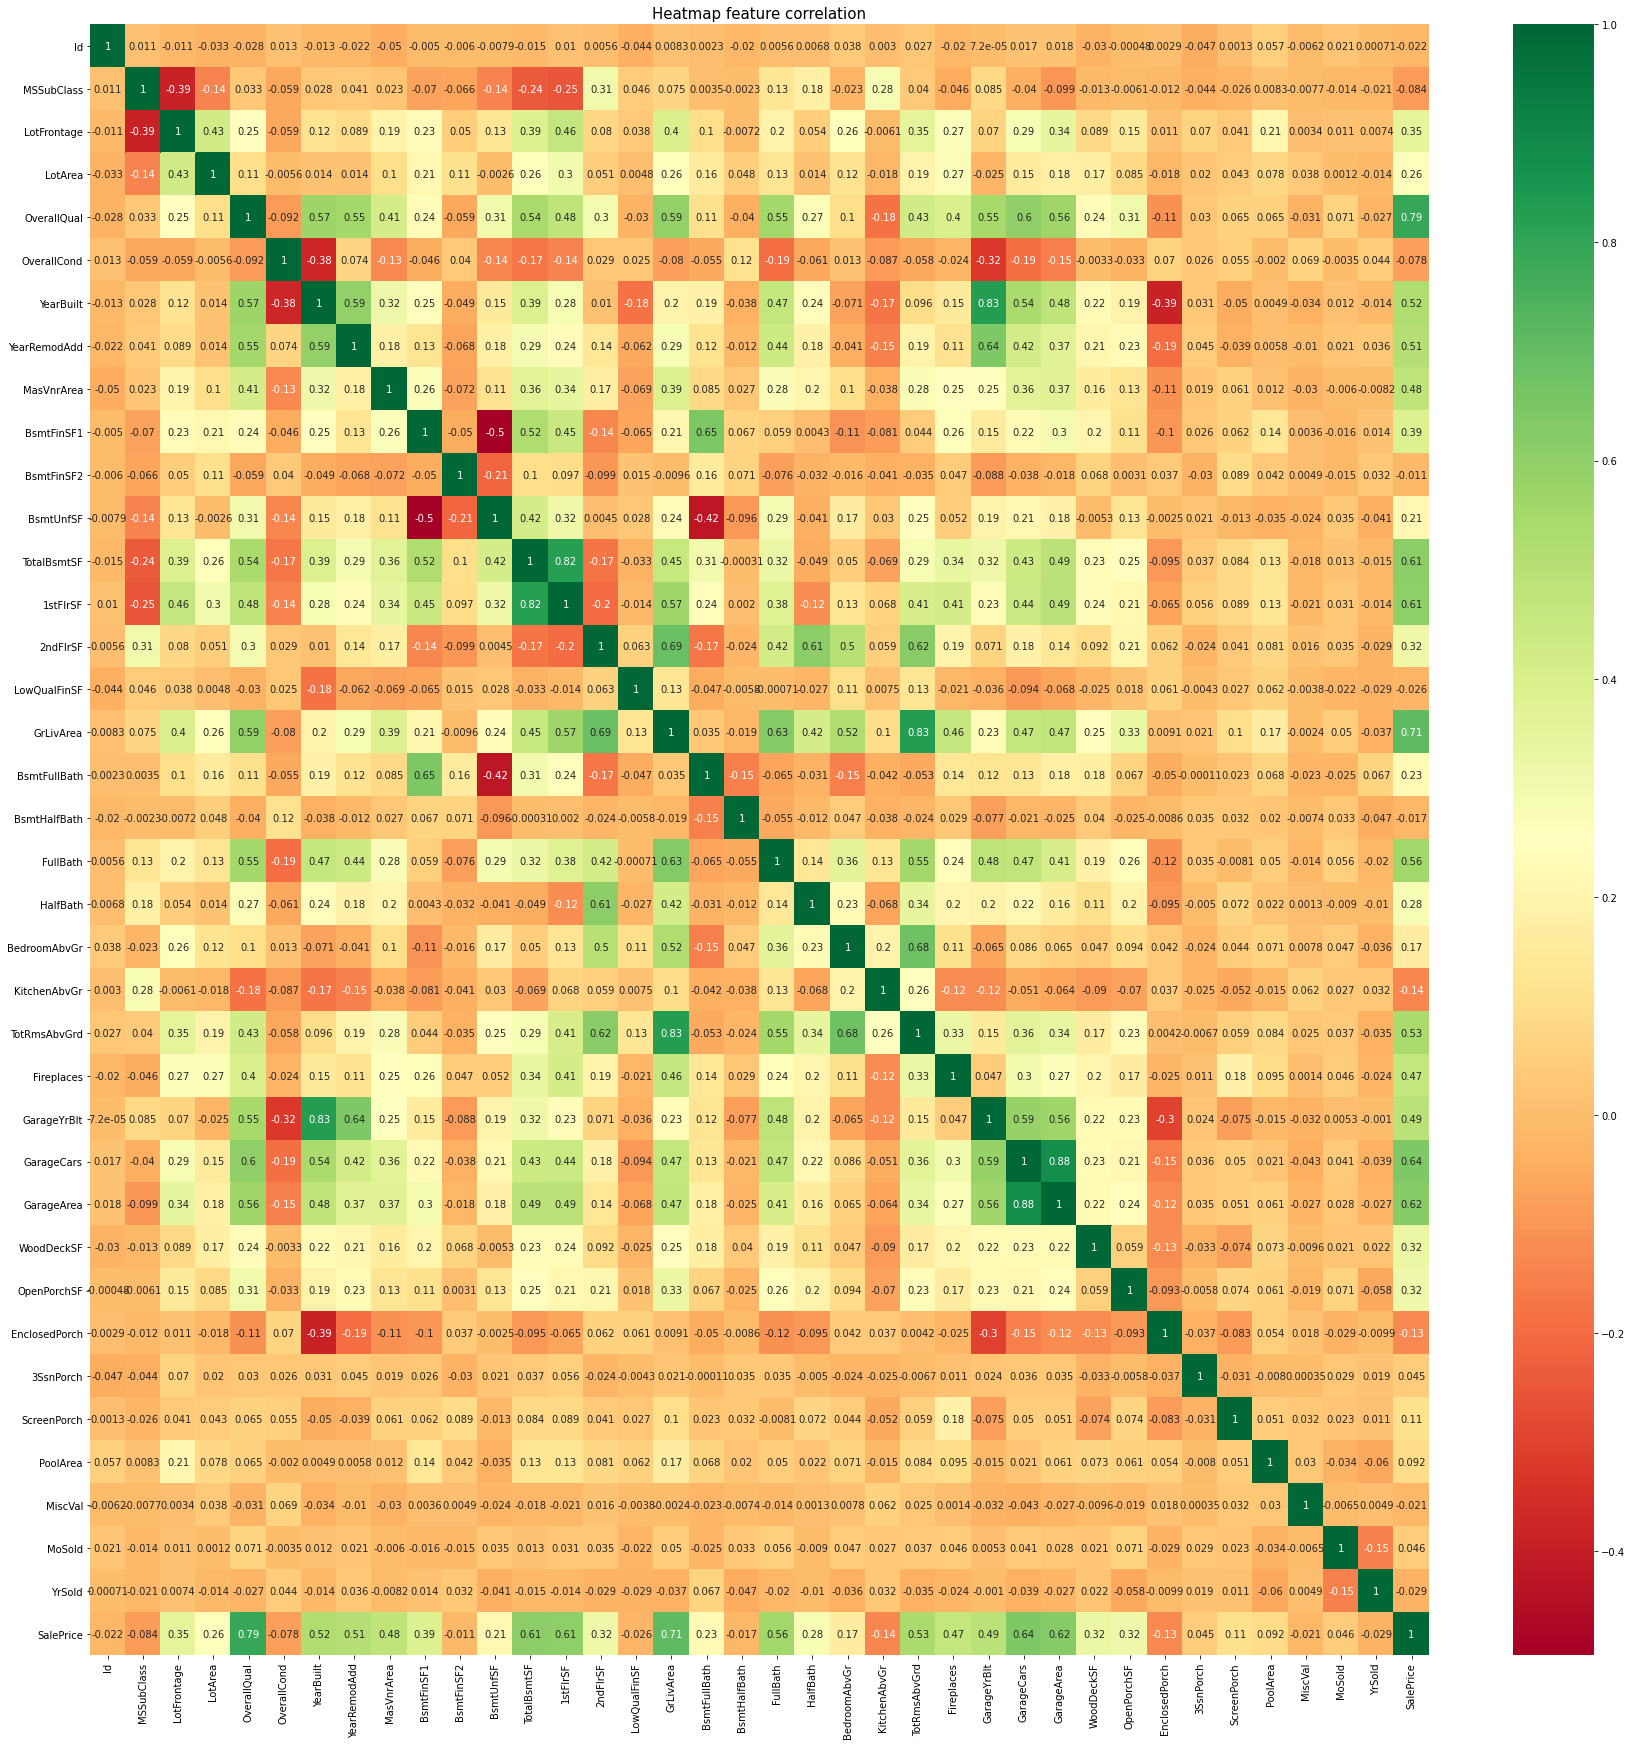

In [296]:
corr = cleaning_train.corr()
top_corr_features = corr.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(cleaning_train[top_corr_features].corr(),
              annot=True,cmap="RdYlGn")
plt.title('Heatmap feature correlation',fontsize =15)
plt.savefig('heatmap all.png')

# Top 10 performance feature

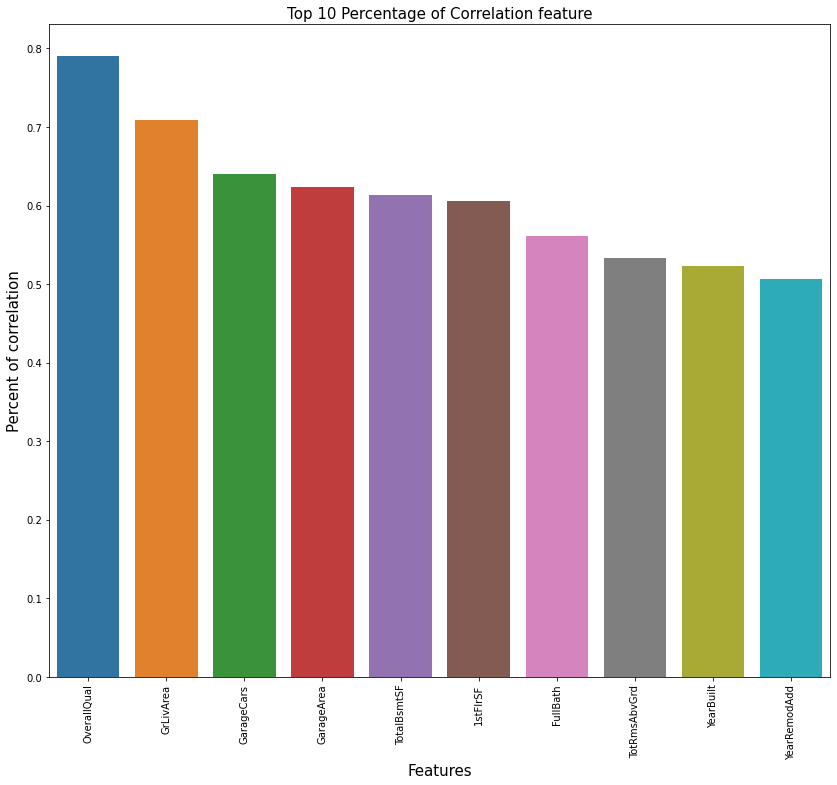

In [297]:
#Correlation with output variable
cor_target = abs(corr["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
rel = pd.DataFrame(relevant_features).sort_values('SalePrice', ascending = False)
rel = rel.reset_index()
rel.columns = ['variable','cor_score']
rel = rel[rel['variable'] != 'SalePrice']
x = rel['variable']
y = rel['cor_score']
fig, axes = plt.subplots(figsize=(14,12))
sns.barplot(x,y)
plt.xticks(rotation='90')
plt.title('Top 10 Percentage of Correlation feature',fontsize =15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of correlation', fontsize=15)
plt.savefig('percent corr.png')

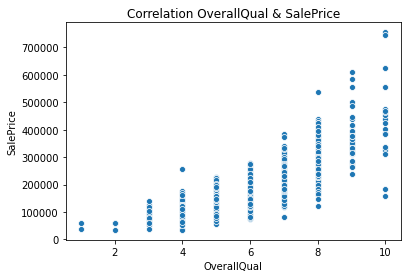

In [298]:
# scatter plot 
x = cleaning_train['OverallQual']
y = cleaning_train['SalePrice']
sns.scatterplot(x,y)
plt.title('Correlation OverallQual & SalePrice')
plt.savefig('corOvSal.png')

# Analysis Predictor or column SalePrice

In [299]:
# cleaning train
cleaning_train[['SalePrice','OverallQual']]

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
...,...,...
1455,175000,6
1456,210000,6
1457,266500,7
1458,142125,5


In [300]:
#remove duplicate
cleaning_train = cleaning_train[~cleaning_train['Id'].duplicated()]
cleaning_test = cleaning_test[~cleaning_test['Id'].duplicated()]

print("trainset",trainset.shape)
print("testset",testset.shape)
trainset = pd.get_dummies(cleaning_train)
testset = pd.get_dummies(cleaning_test)

trainset (1460, 81)
testset (1459, 80)


In [155]:
# equalize shape reduce column in train
col_trainset = trainset.columns.tolist()
col_testset = testset.columns.tolist()
to_drop = [s for s in col_trainset if s not in col_testset]
to_drop

['SalePrice',
 'Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex']

In [201]:
# spliting X and y in data train
X = trainset.drop(to_drop,axis=1)
X = X.drop('Id',axis=1)
y = trainset['SalePrice']

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size =0.25,random_state = 100)

In [157]:
X_train.shape

(1168, 259)

In [202]:
from sklearn.preprocessing import StandardScaler

In [203]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling


# Random Forest Regression

In [245]:

# # Fit the random search model
rf = RandomForestRegressor(n_estimators = 81, random_state = 2, max_features = 'log2')
rf.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean sale price:', cleaning_train['SalePrice'].mean())
rmse_RF = np.sqrt(metrics.mean_squared_error(y_test, y_pred))/cleaning_train['SalePrice'].mean()
rmse_RF

Mean Absolute Error: 16027.777203454885
Mean Squared Error: 772140800.2300173
Root Mean Squared Error: 27787.42161896309
mean sale price: 180921.19589041095


0.1535885360596152

# XGboost

In [244]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=9,                 
                 learning_rate=0.08,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.7,
                 seed=42)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean sale price:', cleaning_train['SalePrice'].mean())
rmse_gboost = np.sqrt(metrics.mean_squared_error(y_test, y_pred))/cleaning_train['SalePrice'].mean()
rmse_gboost

Mean Absolute Error: 16104.299860873287
Mean Squared Error: 754106909.2538295
Root Mean Squared Error: 27461.007069185016
mean sale price: 180921.19589041095


0.1517843552494475

# Linear Regression 

In [267]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean sale price:', cleaning_train['SalePrice'].mean())
rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, y_pred))/cleaning_train['SalePrice'].mean()
rmse_LR

Mean Absolute Error: 1.4629417610492832e+16
Mean Squared Error: 2.5303808521843903e+34
Root Mean Squared Error: 1.5907170874119603e+17
mean sale price: 180921.19589041095


879232021203.0338

In [265]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train, y_train)
y_pred = model_lgb.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean sale price:', cleaning_train['SalePrice'].mean())
lgbm = np.sqrt(metrics.mean_squared_error(y_test, y_pred))/cleaning_train['SalePrice'].mean()
lgbm

Mean Absolute Error: 16772.469962956617
Mean Squared Error: 807488402.7647722
Root Mean Squared Error: 28416.34041823071
mean sale price: 180921.19589041095


0.15706473903391224

In [268]:
data = {'xgboost':rmse_gboost,
         'Random Forest Regressop':rmse_RF,
         'linear reression':rmse_LR,
        'LightGBM':lgbm}
data = pd.DataFrame.from_dict(data, orient='index').reset_index()
data.columns = ['algorithm','rmse_score']
data.sort_values('rmse_score')

,algorithm,rmse_score
0,xgboost,1.517844e-01
1,Random Forest Regressop,1.535885e-01
3,LightGBM,1.570647e-01
2,linear reression,8.792320e+11


# Test set

In [46]:
test_model.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [238]:
#  test model
Xte = testset.drop(['Id'],axis=1)
Xte = sc.transform(Xte)
y_pred = xg_reg.predict(Xte)

In [239]:
#submition
cleaning_test['SalePrice'] =  pd.Series(y_pred)
submit = cleaning_test[['Id','SalePrice']]
submit.to_csv('submission.csv',index=False)